# Programming for Data Analysis Project 2020
This project looks at a real-life phenomenon that can be measured using at least four variable and at least 100 data observations, to examine the variables, their possible distribution and inter-relationships and stimulates a data set based on these findings within this Jupyter notebook.

I am going to base my project on the tips dataset.

Importation of libaries and packages and CSV for the notebook:

In [11]:
import numpy as np
import numpy.random as npr
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv (r"C:\Users\david\OneDrive\Documents\College\GMIT\Programming for Data Analysis\Programming-Project-2020\tips.csv" )

In [12]:
#show the first 5 items of the data set
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
#showing the last 5 items of the data set
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
#describing the tips data set.
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [22]:
#calculating the percentage of the bill that was paid as tip and displaying in a new column
df['% Of Bill Tip Payed'] = df['tip'] / df['total_bill'] * 100

df

,total_bill,tip,sex,smoker,day,time,size,% Of Bill Tip Payed
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [24]:
#from this I am looking at the the totals for each heading
from collections import Counter as cnt
for i in ['sex','smoker','day', 'time', 'size']:
    print (cnt(df.iloc[:][i]),'\n')

Counter({'Male': 157, 'Female': 87}) 

Counter({'No': 151, 'Yes': 93}) 

Counter({'Sat': 87, 'Sun': 76, 'Thur': 62, 'Fri': 19}) 

Counter({'Dinner': 176, 'Lunch': 68}) 

Counter({2: 156, 3: 38, 4: 37, 5: 5, 1: 4, 6: 4}) 



From the above it can be seen that of the 244 tips 157 were from Male customers, 87 from Female customers, of the customer 151 were non smokera nd 93 were smokders.  The bussiest day was sunday and the bussiest meal time was dinner.  Majority of customers booked tables of two. 

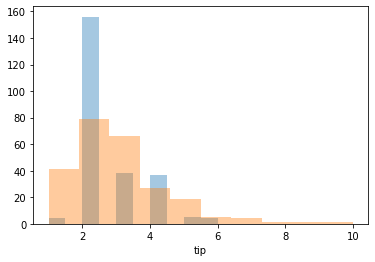

In [38]:
sb.distplot(df['size'],kde=False,bins=10) 
sb.distplot(df['tip'],kde=False,bins=10) 
plt.show()

The above show the relationship between the size of the party and the tip amount. 

In [ ]:
https://github.com/HFintan/pda_proj/blob/master/pda_proj.ipynb